# Topics in Econometrics and Data Science: Tutorial 8

#### General Note

You will very likely find the solution to these exercises online. We, however, strongly encourage you to work on these exercises without doing so. Understanding someone else’s solution is very different from coming up with your own. Use the lecture notes and try to solve the exercises independently.

# Section 2 cont'd: Linear Regression

## Exercise 1: Linear Regression: Inference II - Simulation for the Linear Regression Model (OLS)

Let us consider a univariate regression model 

$$Y = X\beta + \varepsilon,$$
where $Y$ is the outcome variable and $X$ is a regressor. $\varepsilon$ is drawn from a Normal distribution with $\mu = 0$ and $\sigma = 1$ and independent from $X$. We are interested in inference on $\beta$. 

In this exercise, we simulate data according to the regression model above in order to provide evidence in favor of the theoretical results we learned in the lecture.

### A)

Set up a data generating process (DGP) according to the regression model above. 

1. Write a function with inputs  $\beta$ and $n$ and outputs $Y$ and $X$. Generate $X$ as $X \sim_{i.i.d} N(0,1)$. \
\
**Hint:** You can use [`np.random.normal`](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html).

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Set up a function for the DGP
def DGP(beta, n):
    X = np.random.normal(0, 1, n)
    epsilon = np.random.normal(0, 1, n)
    Y = np.dot(X,beta)+epsilon  
    return Y,X 

2. Use your function to generate $n=20$ observations for $Y$ and $X$ and use $\beta = 1$ in your example.

In [3]:
# Try if it works
n = 20
beta = 1

outcome, regressor = DGP(beta,n)

print(outcome)
print(regressor)

[ 0.13601167 -1.08677066 -0.96454645  1.15659478  3.76095546  0.29389892
  0.47602979  2.1827907  -3.50876782 -0.52362234 -0.19705736 -1.39530728
  1.48376414  0.73971505  0.02529763 -0.93952599  0.70251699 -2.01497123
 -1.41754481  2.48270338]
[ 0.47013347 -0.14247138 -0.44746009  1.35257705  1.25679563 -0.07365153
  0.3302266   1.30795916 -3.06432254 -0.04867122 -1.02154772 -0.76813825
  2.17606343  0.71718557 -0.28726914 -0.4183048   1.06937334 -0.52921169
  0.5055522   0.64626152]


3. Run a linear regression based on your generated data in step 2. \
\
**Hint:** Use the package [`statsmodels`](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html).

In [4]:
#  Run a linear regression 
olssim = sm.OLS(outcome, regressor)
olssim = olssim.fit()
olssim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              33.47
Date:                Mon, 08 Dec 2025   Prob (F-statistic):                    1.42e-05
Time:                        22:14:07   Log-Likelihood:                         -28.083
No. Observations:                  20   AIC:                                      58.17
Df Residuals:                      19   BIC:                                      59.16
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1863      0.205      5.785      0.000       0.757       1.615
==============================================================================
Omnibus:                        2.668   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.244
Skew:                           0.576   Prob(JB):                        0.537
Kurtosis:                       3.407   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### B) 

Set up a simulation study to estimate the *Bias* and *Standard Error* of $\hat{\beta}$. How do the results change if $n$ increases, e.g. $n=10, 20, 30, 40, 50, 100, 200, 400$? Illustrate your results with an appropriate graphic. Do your result support the claim that the OLS estimator is an unbiased estimator? What can you say about estimation uncertainty?

In [5]:
# Bias 
Bias = beta - olssim.params[0]
SE = olssim.bse[0]

print("Bias", Bias)
print("SE", SE)

Bias -0.1862644276636991
SE 0.20504786944280973


In [ ]:
# We start with a loop for a varying number of observations 
# Only one Repetition first
beta = 1
nobs = [10, 20, 30, 40, 50, 100, 200, 400]

# We need to declare objects to save the results
Bias = np.zeros(len(nobs))
SE = np.zeros(len(nobs))
Estim = np.zeros(len(nobs))

# First, let us simply extract the estimates in every repetition. 
np.random.seed(1234)

for i in range(0,len(nobs)):
    n = nobs[i]
    outcome, regressor = DGP(beta, n)
    ols = sm.OLS(outcome, regressor)
    ols = ols.fit()
    Estim[i] = ols.params[0]
    Bias[i] = beta - ols.params[0]
    SE[i] = ols.bse[0]

print("No of obs:", nobs)
print("Estimates:", Estim)
print("Bias:", Bias)
print("SE:", SE)

No of obs: [10, 20, 30, 40, 50, 100, 200, 400]
Estimates: [1.46628507 1.07454816 1.20126315 0.95370717 1.07982331 1.01227102
 0.95382576 1.02612073]
Bias: [-0.46628507 -0.07454816 -0.20126315  0.04629283 -0.07982331 -0.01227102
  0.04617424 -0.02612073]
SE: [0.30356697 0.20523498 0.12242688 0.14805249 0.13625233 0.09542455
 0.0708572  0.04996335]


In [7]:
beta_0 = np.repeat(beta, len(nobs))
beta_0

array([1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
zero = np.zeros(len(nobs))
zero

array([0., 0., 0., 0., 0., 0., 0., 0.])

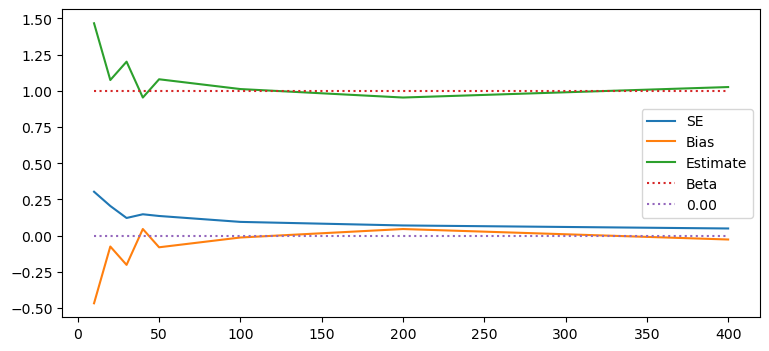

In [9]:
fig = plt.figure(figsize=(9, 4))
plt.plot(nobs, SE, label = "SE")
plt.plot(nobs, Bias, label = "Bias")
plt.plot(nobs, Estim, label = "Estimate")
plt.plot(nobs, beta_0, label = "Beta", linestyle = "dotted")
plt.plot(nobs, zero, label = "0.00", linestyle = "dotted")
plt.legend()
plt.show()

### C)

Repeat the simulation from before $R=100$ times and report the average results (i.e. the average *Bias*, *Standard Error* and $\hat{\beta}$ *estimate* over the $R$ repetitions). Illustrate your results with an appropriate graphic.

**Hint:** Write a function that executes the estimation from before automatically and that repeats the calculations $R$ times. The inputs of this function are $n$ and $R$ and the outpus are the average *Bias*, the average *Standard Error* and the average $\hat{\beta}$ *estimate*.
    

In [10]:
# Input: nobs, nrep
# Given a number of observation, we want to repeat the simulation R times
# Output: mean Bias, SE and Estimates

def SIM(n, R):
    
    beta = 1
    Estim = np.zeros(R)
    Bias = np.zeros(R)
    SE = np.zeros(R)
    
        
    for i in range(0,R):
        outcome, regressor = DGP(beta, n)
        ols = sm.OLS(outcome, regressor)
        ols = ols.fit()
        Estim[i] = ols.params[0]
        Bias[i] = beta - ols.params[0]
        SE[i] = ols.bse[0]
        
    mBias = np.mean(Bias)
    mSE = np.mean(SE)
    mEstim = np.mean(Estim)
    
    return mBias, mSE, mEstim

In [11]:
np.random.seed(2)
SIM(100, 50)

(0.005504440656150824, 0.09876240048185254, 0.9944955593438491)

In [12]:
# Results if we use a loop 
R = 50
n = 100
beta = 1

Estim = np.zeros(R)
Bias = np.zeros(R)
SE = np.zeros(R)

np.random.seed(2)

for i in range(0,R):
        outcome, regressor = DGP(beta, n)
        ols = sm.OLS(outcome, regressor)
        ols = ols.fit()
        Estim[i] = ols.params[0]
        Bias[i] = beta - ols.params[0]
        SE[i] = ols.bse[0]
print(np.mean(Bias))
print(np.mean(SE))
print(np.mean(Estim))

0.005504440656150824
0.09876240048185254
0.9944955593438491


In [13]:
np.random.seed(1234)
R = 100
beta = 1
nobs = [10, 20, 30, 40, 50, 100, 200, 400]

# We need to declare objects to save the average results per nobs

AvgBias = np.zeros(len(nobs))
AvgSE = np.zeros(len(nobs))
AvgEstim = np.zeros(len(nobs))

In [14]:
# First, let us simply extract the estimates in every repetition. 
np.random.seed(1234)

for i in range(0,len(nobs)):
    n = nobs[i]
    AvgBias[i], AvgSE[i], AvgEstim[i] = SIM(n, R)


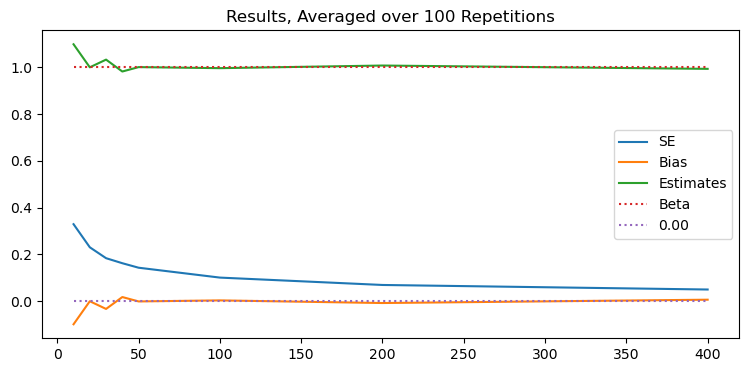

In [15]:
fig = plt.figure(figsize=(9, 4))
plt.plot(nobs, AvgSE, label = "SE")
plt.plot(nobs, AvgBias, label = "Bias")
plt.plot(nobs, AvgEstim, label = "Estimates")
plt.plot(nobs, beta_0, label = "Beta", linestyle = "dotted")
plt.plot(nobs, zero, label = "0.00", linestyle = "dotted")
plt.title("Results, Averaged over 100 Repetitions")
plt.legend()
plt.show()

### D) 

In the lecture, we have learned that the t-statistic $t$ for the regression coefficient $\beta$ is asymptotically normal if $n$ is large. Use the simulation study to provide evidence that in the setting above it holds that:
    $$\sqrt{n}\frac{(\hat{\beta} - \beta)}{\hat{\sigma}} \xrightarrow[]{d} N(0,1)$$
**Hint:** Repeat the simulation from above. Now, we need to save the $\hat{\beta}$ so that we can compute $\sqrt{n}(\hat{\beta}-\beta)$. You may assume that $\hat{\sigma}=1$. For this, write a new function similiar to the one in part C. The inputs are $n$ and $R$ and the output is an array (of length $R$) that contains the $\hat{\beta}$. Illustrate the results by generating a bar plot similar to that in Lecture 2 (slide 23).
   


In [16]:
# Modify the SIM Function

def SIM2(n, R):
    
    beta = 1
    Estim = np.zeros(R)
        
    for i in range(0,R):
        outcome, regressor = DGP(beta, n)
        ols = sm.OLS(outcome, regressor)
        ols = ols.fit()
        Estim[i] = ols.params[0]
            
    return Estim

In [17]:
R = 1000
est10 = SIM2(10, R)
est20 = SIM2(20, R)
est50 = SIM2(50, R)
est100 = SIM2(100, R)
est200 = SIM2(200, R)
est400 = SIM2(400, R)

 We can already show that $\hat{\beta}$ is $\hat{\beta} \sim N(\beta,\sigma^2_{\hat{\beta}})$

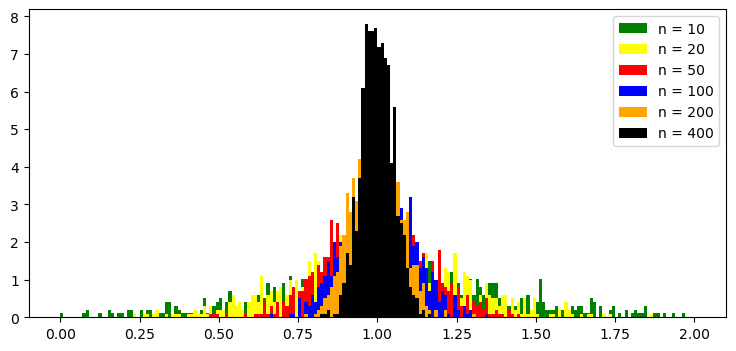

In [18]:
fig = plt.figure(figsize=(9, 4))
bins = np.linspace(-0, 2, 201)
plt.hist(est10, bins=bins,density=True,label='n = 10', color = "green")
plt.hist(est20, bins=bins,density=True,label='n = 20', color = "yellow")
plt.hist(est50, bins=bins,density=True,label='n = 50', color = "red")
plt.hist(est100, bins=bins,density=True,label='n = 100', color = "blue")
plt.hist(est200, bins=bins,density=True,label='n = 200', color = "orange")
plt.hist(est400, bins=bins,density=True,label='n = 400', color = "black")
plt.legend() 

plt.show()

We want to illustrate that $\sqrt{n}\frac{(\hat{\beta} - \beta)}{1} \xrightarrow[]{d} N(0,1)$.

In [19]:
res10 = np.sqrt(10)*( SIM2(10, R) - beta)
res20 = np.sqrt(20)*( SIM2(20, R) - beta)
res50 = np.sqrt(50)*( SIM2(50, R) - beta)
res100 = np.sqrt(100)*( SIM2(100, R) - beta)
res200 = np.sqrt(200)*( SIM2(200, R) - beta)
res400 = np.sqrt(400)*( SIM2(400, R) - beta)

In [20]:
from scipy.stats import norm
xy = np.linspace(-10, 10, 201)
y = norm.pdf(xy, 0, 1)

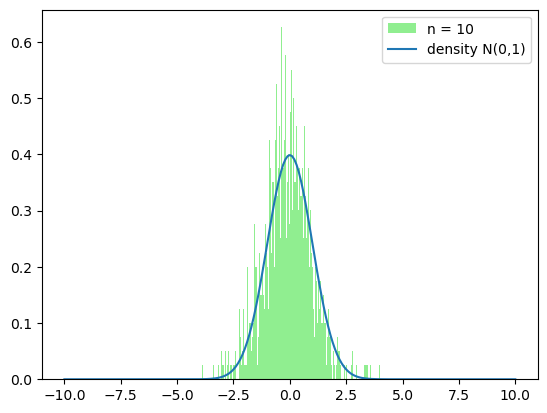

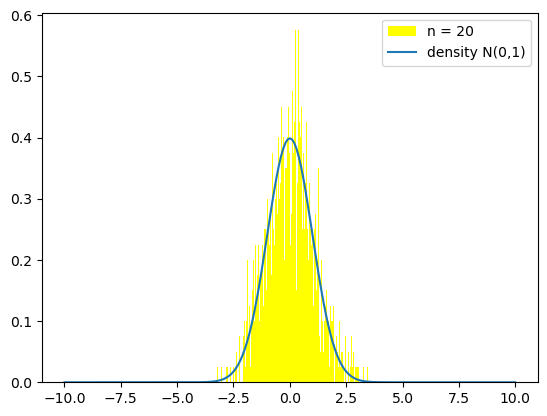

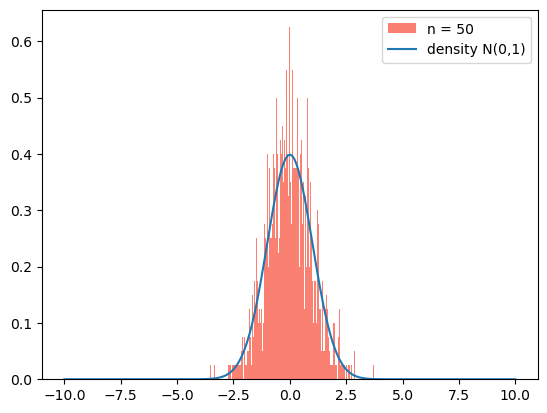

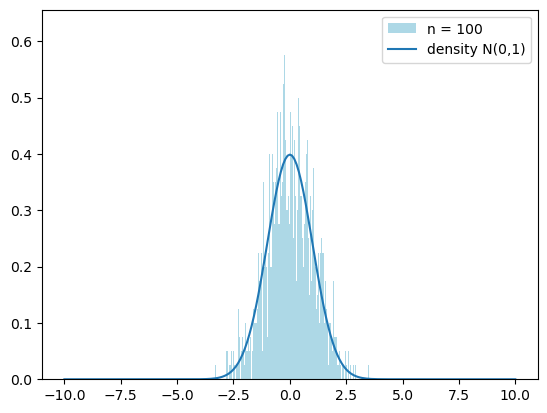

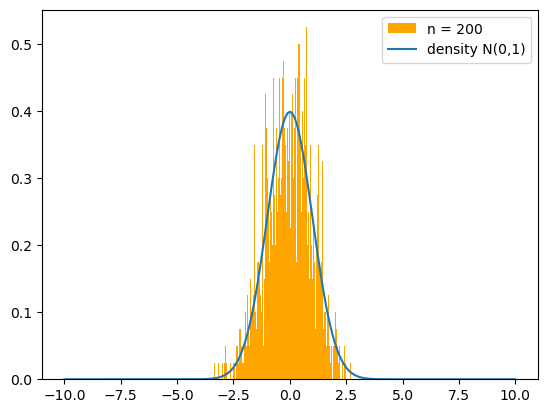

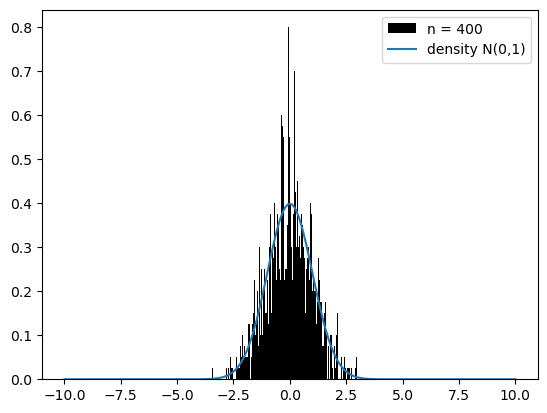

In [21]:
fig = plt.figure(4)
bins = np.linspace(-4, 4, 201)
plt.hist(res10, bins=bins,density=True,label='n = 10', color = "lightgreen")
plt.plot(xy, y, '-', linewidth=1.5, label='density N(0,1)') # adding the density
plt.legend() 
plt.show()

plt.hist(res20, bins=bins,density=True,label='n = 20', color = "yellow")
plt.plot(xy, y, '-', linewidth=1.5, label='density N(0,1)') # adding the density
plt.legend() 
plt.show()

plt.hist(res50, bins=bins,density=True,label='n = 50', color = "salmon")
plt.plot(xy, y, '-', linewidth=1.5, label='density N(0,1)') # adding the density
plt.legend() 
plt.show()

plt.hist(res100, bins=bins,density=True,label='n = 100', color = "lightblue")
plt.plot(xy, y, '-', linewidth=1.5, label='density N(0,1)') # adding the density
plt.legend() 
plt.show()

plt.hist(res200, bins=bins,density=True,label='n = 200', color = "orange")
plt.plot(xy, y, '-', linewidth=1.5, label='density N(0,1)') # adding the density
plt.legend() 
plt.show()

plt.hist(res400, bins=bins,density=True,label='n = 400', color = "black")
plt.plot(xy, y, '-', linewidth=1.5, label='density N(0,1)') # adding the density
plt.legend() 
plt.show()